# Ocena Modelu (na razie wersja na "chłopski rozum")

### Czy klikając, jeśli kod się odpala, to oznacza nasz sukces?

Nie.
To tak, jakbyś powiedział, że skoro auto odpala, to na pewno jest gotowe na podróż dookoła świata. Może nie ma hamulców, a może zaraz się rozkraczy na środku drogi? Sprawdźmy!


### Przybliżanie funkcji wielomianami

Wyobraź sobie, że rysujesz wykres jakiejś dziwnej funkcji, ale zamiast niej próbujesz ją zastąpić wielomianem. To trochę jak układanie kawałków puzzli tak, by wyglądały jak obrazek. Czasem robimy to świetnie – nasz wielomian pięknie odwzorowuje rzeczywistość. Czasem jednak przesadzamy i zaczynamy dopasowywać się nawet do najmniejszych zakłóceń – i tu pojawia się overfitting.

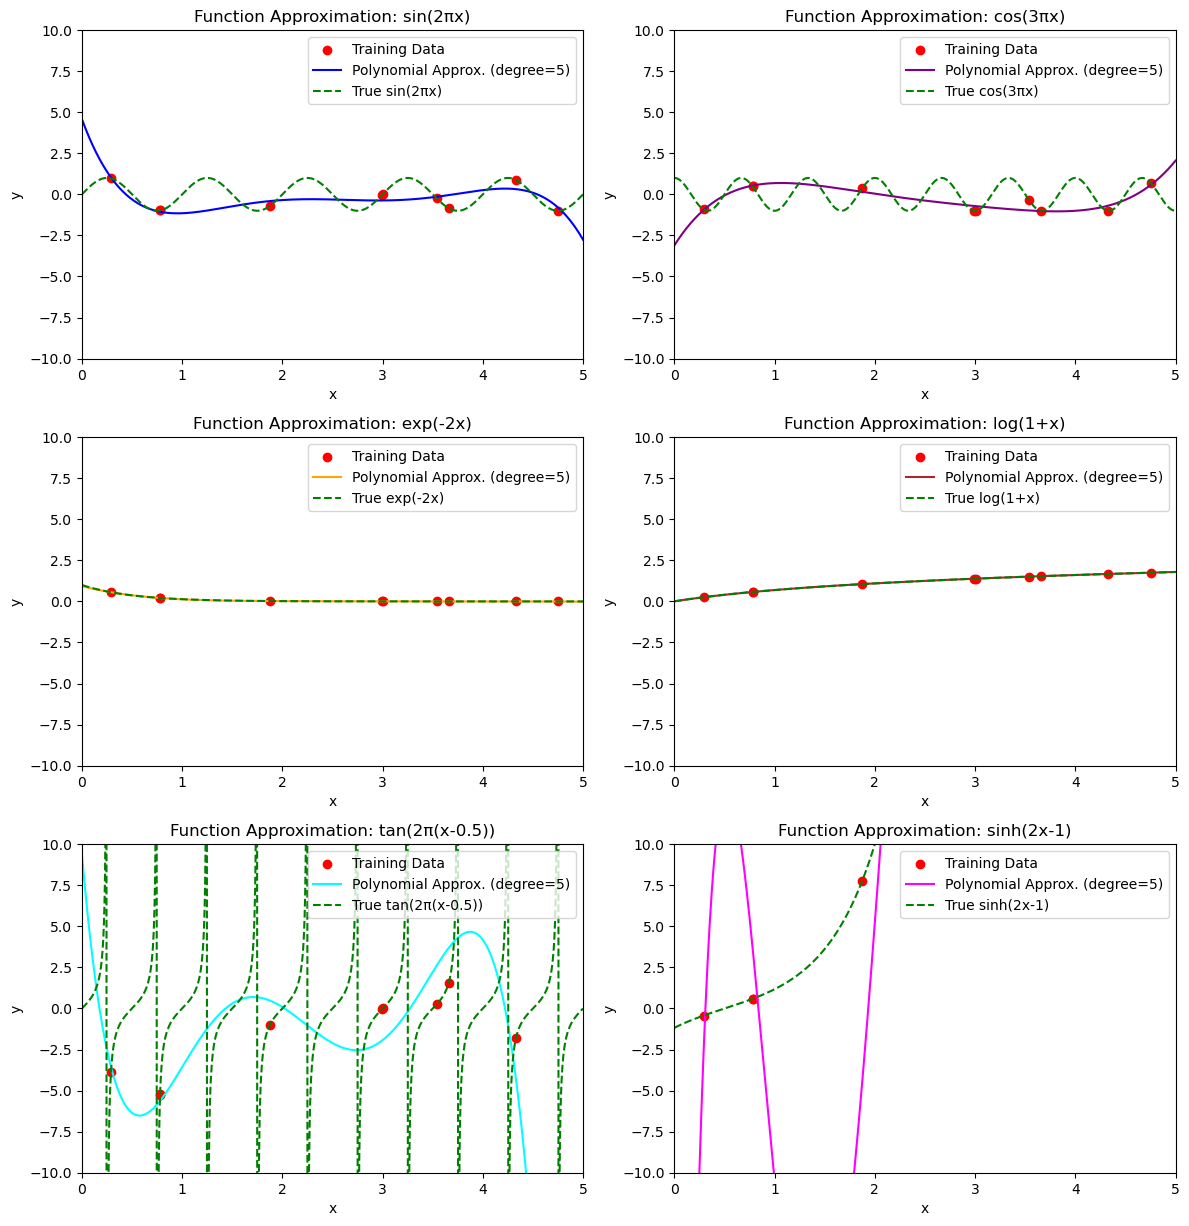

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define functions to approximate
def true_function_1(x):
    return np.sin(2 * np.pi * x)   # Adding noise

def true_function_2(x):
    return np.cos(3 * np.pi * x)

def true_function_3(x):
    return np.exp(-2 * x)

def true_function_4(x):
    return np.log(1 + x)

def true_function_5(x):
    return np.tan(2 * np.pi * (x - 0.5))   # High variation function

def true_function_6(x):
    return np.sinh(2 * x - 1)   # Rapidly growing function

# Generate sample data
np.random.seed(42)
x_train = np.sort(np.random.uniform(0,5,10))  # 20 random points
y_train_1 = true_function_1(x_train)
y_train_2 = true_function_2(x_train)
y_train_3 = true_function_3(x_train)
y_train_4 = true_function_4(x_train)
y_train_5 = true_function_5(x_train)
y_train_6 = true_function_6(x_train)

# Define polynomial degree
degree = 5  # You can change this for different approximations

# Create polynomial regression model and fit for each function
x_test = np.linspace(0, 5, 1000)
models = []
y_preds = []
y_true = [
    np.sin(2 * np.pi * x_test), np.cos(3 * np.pi * x_test),
    np.exp(-2 * x_test), np.log(1 + x_test),
    np.tan(2 * np.pi * (x_test - 0.5)), np.sinh(2 * x_test - 1)
]
y_trains = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6]
labels = ['sin(2πx)', 'cos(3πx)', 'exp(-2x)', 'log(1+x)','tan(2π(x-0.5))', 'sinh(2x-1)']
colors = ['blue', 'purple', 'orange', 'brown', 'cyan', 'magenta']

plt.figure(figsize=(12, 16))
for i, (y_train, y_t, label, color) in enumerate(zip(y_trains, y_true, labels, colors)):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred = model.predict(x_test.reshape(-1, 1))
    models.append(model)
    y_preds.append(y_pred)

    plt.subplot(4, 2, i + 1)
    plt.scatter(x_train, y_train, label='Training Data', color='red')
    plt.plot(x_test, y_pred, label=f'Polynomial Approx. (degree={degree})', color=color)
    plt.plot(x_test, y_t, label=f'True {label}', color='green', linestyle='dashed')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Function Approximation: {label}')
    plt.axis([0, 5, -10, 10])


plt.tight_layout()
plt.show()


### Overfitting i Underfitting

#### Overfitting – czyli nie ucz się wszystkiego na pamięć

Jeśli nauczysz się książki na pamięć, ale nie zrozumiesz jej sensu, to w pytaniach otwartych polegniesz. To samo dzieje się z modelem, który nauczył się perfekcyjnie dopasowywać do danych treningowych, ale totalnie nie radzi sobie z nowymi przypadkami. Jest jak uczeń, który zna każde słowo z notatek, ale nie potrafi ich użyć w praktyce.

#### Underfitting – czyli nie przykładaj się za mało

Z drugiej strony, jeśli w ogóle się nie postarasz i będziesz mówił tylko ogólnikami, to też nie zdasz testu. Model, który jest za prosty, nie potrafi dobrze odwzorować rzeczywistości – to właśnie underfitting. Tak jakbyś na każde pytanie odpowiadał „To zależy” – może i nie skłamiesz, ale raczej nie zdobędziesz wysokiej oceny.

### Irysy i confusion matrix – skąd wiemy, czy model jest dobry?

Klasyczne zadanie które już poznaliśmy to rozpoznawanie gatunków irysów. Masz dane o kwiatach i model, który ma przewidzieć ich gatunek. Ale skąd wiadomo, czy robi to dobrze?



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  # importujemy ten kod


data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["Długość działki kielicha", "Szerokość działki kielicha", "Długość płatka", "Szerokość płatka", "Gatunek"]
df = pd.read_csv(data_url, names=columns)

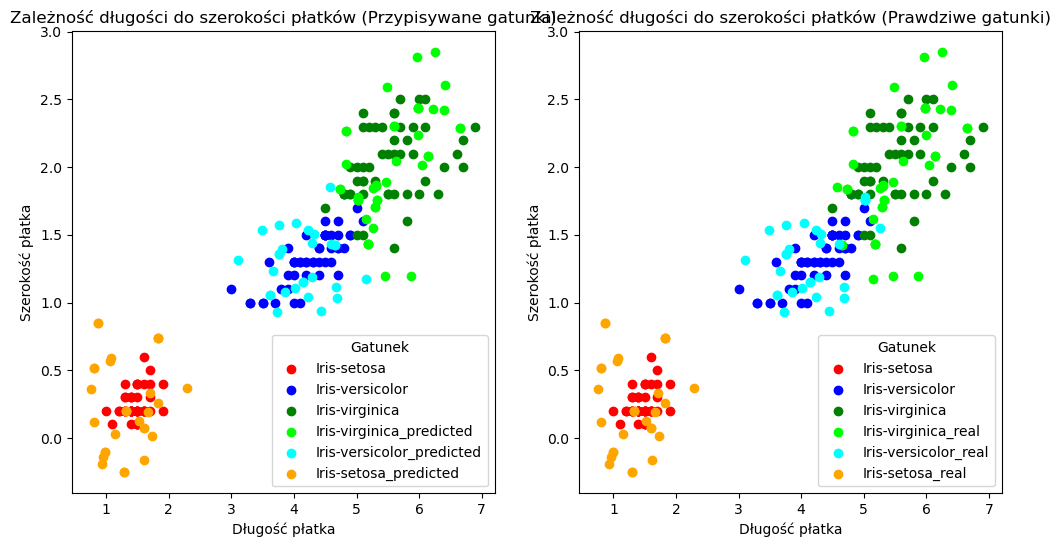

In [7]:
np.random.seed(42)


X = np.zeros(len(df['Długość płatka']))
Y = np.zeros(len(df['Długość płatka']))
test_labels = np.array([])

for i in range(len(df['Długość płatka'])):
    X[i] = df['Długość płatka'][i] + np.random.uniform(-0.5, 0.5)
    Y[i] = df['Szerokość płatka'][i] + np.random.uniform(-0.5, 0.5)
    test_labels = np.append(test_labels, df['Gatunek'][i])


train_data = [[x,y] for x,y in zip(df['Długość płatka'], df['Szerokość płatka'])]
train_labels = df['Gatunek']

rng = np.random.default_rng()
num_test_data = 100

subset_test_data = rng.choice(np.array([[x,y,tl] for x,y,tl in zip(X,Y,test_labels)], dtype=object), num_test_data)

test_labels = [tl for _,_,tl in subset_test_data]
test_data = [[x,y] for x,y,_ in subset_test_data]


knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_data, train_labels)
test_pred = knn.predict(test_data)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
colors = {species: color for species, color in zip(df['Gatunek'].unique(), ['red', 'blue', 'green'])}
for species in df['Gatunek'].unique():
    subset = df[df['Gatunek'] == species]
    plt.scatter(subset['Długość płatka'], subset['Szerokość płatka'], label=species, color=colors[species])

predictions_bins = {species : (color,[]) for species, color in zip(list(set(test_pred)), ['lime', 'cyan', 'orange'])}
for i,point in enumerate(test_data):
    predictions_bins[test_pred[i]][1].append(point)
for species, (color, points) in predictions_bins.items():
    plt.scatter([x for x,_ in points],[y for _,y in points], label=species + "_predicted", color=color)

plt.xlabel("Długość płatka")
plt.ylabel("Szerokość płatka")
plt.title("Zależność długości do szerokości płatków (Przypisywane gatunki)")
plt.legend(title='Gatunek', loc='lower right')

plt.subplot(1,2,2)
for species in df['Gatunek'].unique():
    subset = df[df['Gatunek'] == species]
    plt.scatter(subset['Długość płatka'], subset['Szerokość płatka'], label=species, color=colors[species])
real_bins = {species : (color,[]) for species, color in zip(list(set(test_labels)), ['lime', 'cyan', 'orange'])}
for i,point in enumerate(test_data):
    real_bins[test_labels[i]][1].append(point)
for species, (color, points) in real_bins.items():
    plt.scatter([x for x,_ in points],[y for _,y in points], label=species + "_real", color=color)

plt.xlabel("Długość płatka")
plt.ylabel("Szerokość płatka")
plt.title("Zależność długości do szerokości płatków (Prawdziwe gatunki)")
plt.legend(title='Gatunek', loc='lower right')
plt.show()


#### Confusion Matrix
Tutaj pojawia się confusion matrix – tabela, która pokazuje, gdzie model trafił, a gdzie się pomylił. Dzięki niej widzimy, czy bardziej myli jeden gatunek z drugim, czy może w ogóle zgaduje na chybił-trafił.

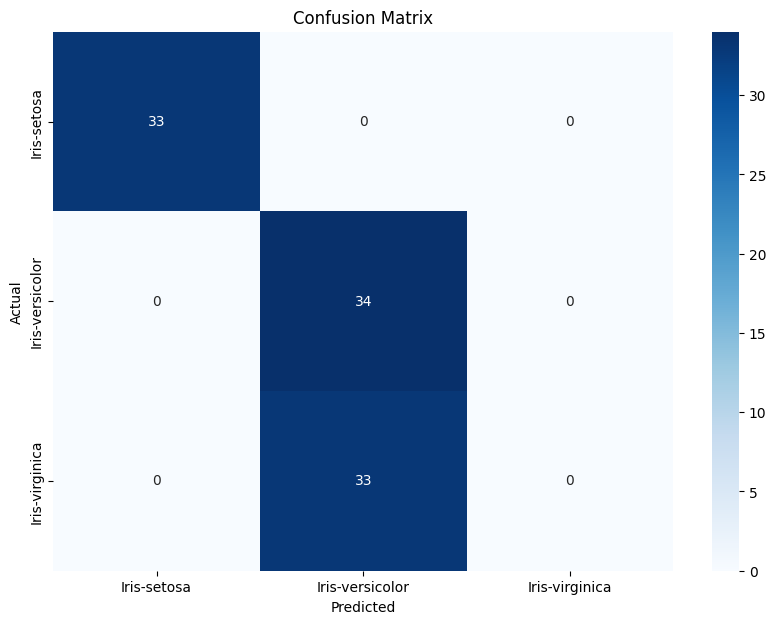

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(train_data, train_labels)
test_pred = knn.predict(test_data)
# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Na końcu dnia liczy się nie tylko to, że model działa, ale jak dobrze działa. No i właśnie dlatego uczymy się oceny modeli – żeby nie skończyć z czymś, co tylko ładnie wygląda, ale w rzeczywistości jest kompletnie bezużyteczne.